In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
print(train_data.head())

   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     6.800000         0.037490   48.6034                       2004   
1    15.600000         0.172597  114.8518                       1997   
2    12.911575         0.054721  107.8254                       1985   
3    11.800000         0.098312   81.4618                       1998   
4    17.850000         0.046600  125.1388                       2004   

   Item_Outlet_Sales  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
0           291.6204                    0                         1   
1          2163.1842                    0                         1   
2          2387.5588                    0                         1   
3           161.1236                    0                         1   
4          1981.4208                    0                         0   

   Item_Fat_Content_Regular  Item_Fat_Content_low fat  Item_Fat_Content_reg  \
0                         0                         0        

In [4]:
print("\nShape of training data: ", train_data.shape)
print("\nShape of testing data: ", test_data.shape)


Shape of training data:  (1364, 36)

Shape of testing data:  (341, 36)


In [5]:
train_x = train_data.drop(columns = ['Item_Outlet_Sales'], axis = 1)
train_y = train_data['Item_Outlet_Sales']

In [6]:
test_x = test_data.drop(columns = ['Item_Outlet_Sales'], axis = 1)
test_y = test_data['Item_Outlet_Sales']

In [7]:
model = LinearRegression()

In [8]:
model.fit(train_x, train_y)

LinearRegression()

In [9]:
print('\nCoefficient of model: ', model.coef_)


Coefficient of model:  [-3.84197604e+00  9.83065945e+00  1.61711856e+01  6.09197622e+01
 -8.64161561e+01  1.23593376e+02  2.34714039e+02 -2.44597425e+02
 -2.72938329e+01 -8.09611456e+00 -3.01147840e+02  1.70727611e+02
 -5.40194744e+01  7.34248834e+01  1.70313375e+00 -5.07701615e+01
  1.63553657e+02 -5.85286125e+01  1.04913492e+02 -6.01944874e+01
  1.98948206e+02 -1.40959023e+02  1.19426257e+02  2.66382669e+01
 -1.85619792e+02  1.43925357e+03  2.16134663e+02  3.54723990e+01
  3.54832996e+02 -5.54559635e+00 -3.49287400e+02 -1.39202954e+03
 -2.57982359e+02 -9.59016062e+02  2.60902796e+03]


In [10]:
print('\nIntercept of model: ', model.intercept_)


Intercept of model:  -121926.97473297706


In [11]:
predict_train = model.predict(train_x)
print('\nItem_Outlet_Sales on training data', predict_train)


Item_Outlet_Sales on training data [ 803.88817641 1733.98835979 3294.52154482 ...  811.16967914 2343.96927185
 2444.98869913]


In [12]:
rmse_train = mean_squared_error(train_y, predict_train) ** (0.5)
print('\nRMSE on train dataset : ', rmse_train)


RMSE on train dataset :  1135.8159344155245


In [13]:
predict_test = model.predict(test_x)
print('\nItem_Outlet_Sales on test data', predict_test)


Item_Outlet_Sales on test data [ 1615.37962439  3168.60806673  2564.31326686  2685.29698657
  2771.82059109  4223.3788671   2615.10827403   565.8088248
  4000.68496927  1035.54578573  2184.60316447  1033.54185438
   150.2280464   1616.19932803  2370.37858454  1953.69332501
  2307.09514556  1429.85271583  2343.42149697  3780.28905363
   583.44339124  1089.08346168  2323.64661483  3559.90832258
  1829.46789667  1602.03985138   840.70282292  1823.14253132
  3145.30906529  1823.30397678  2103.35401623  3025.02597477
  2265.03907268   697.33936172  4474.05156681  2270.45195749
  1897.45212218  3305.0110824   2228.36615412  3767.90052861
  2162.33844918   665.40410258  -926.22966665   738.30407877
   197.90808777  2483.25075805  3693.05388377  2458.43116228
  1329.02544771   -57.67123156  1952.26612825  3614.4167807
  2127.22359714  2486.1932574   1826.90446272   786.7283994
  3200.67525412  1981.66000538  2326.98747373  3535.12951812
    53.47568771   129.4629475   4259.8975191   3732.1522

In [14]:
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  1009.2517232214238


In [15]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Size_High                   0
O

In [16]:
# Adding Outlet_Age feature
train_x['Outlet_Age'] = 2024 - train_x['Outlet_Establishment_Year']
test_x['Outlet_Age'] = 2024 - test_x['Outlet_Establishment_Year']

In [17]:
# Dropping the Outlet_Establishment_Year column as it's no longer needed
train_x = train_x.drop(columns=['Outlet_Establishment_Year'], axis=1)
test_x = test_x.drop(columns=['Outlet_Establishment_Year'], axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [20]:
from sklearn.linear_model import Ridge, Lasso

In [21]:
# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can tune alpha
ridge_model.fit(train_x, train_y)

Ridge()

In [22]:
# Coefficients and intercept of the Ridge model
print('\nRidge Coefficient of model:', ridge_model.coef_)
print('\nRidge Intercept of model:', ridge_model.intercept_)


Ridge Coefficient of model: [-1.65571461e+01  4.24502105e-01  1.01305436e+03 -4.50939347e+01
 -9.59546465e+00  4.28565371e+01 -4.30661568e+01 -1.84122193e+01
 -4.45325357e+00 -5.06443161e+01  1.46470602e+01 -1.73133423e+01
  1.73297492e+01 -2.55920141e+00 -2.12194699e+01  2.15044404e+01
 -1.66371860e+01  2.84516383e+01 -1.52165855e+01  2.54437523e+01
 -1.55085177e+01  3.78664408e+01  3.77489744e+00 -2.85701835e+01
  4.03351436e+02  1.07037390e+02  1.58530185e+01  1.46125552e+02
  4.59269430e+00 -1.40638073e+02 -4.30185121e+02 -4.18309389e+01
 -2.50702719e+02  7.85770998e+02 -4.47153304e+02]

Ridge Intercept of model: 2237.647877272728


In [23]:
# Predict the target on the training and test dataset using Ridge
predict_train_ridge = ridge_model.predict(train_x)
rmse_train_ridge = mean_squared_error(train_y, predict_train_ridge)**0.5
print('\nRidge RMSE on train dataset:', rmse_train_ridge)


Ridge RMSE on train dataset: 1135.8427408994376


In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, train_x, train_y, cv=5, scoring='neg_root_mean_squared_error')
print('Average CV RMSE:', -cv_scores.mean())

Average CV RMSE: 1158.747562544845


In [26]:
import matplotlib.pyplot as plt

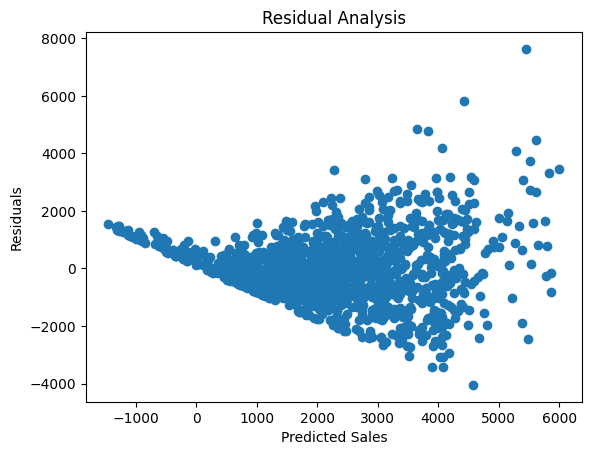

In [27]:
# Residuals for the training dataset
residuals = train_y - predict_train
plt.scatter(predict_train, residuals)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
# Define the parameter grid for Ridge regression
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

In [30]:
# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_root_mean_squared_error')

In [31]:
print('Best Parameters from GridSearch:', grid_search.best_params_)
print('Best CV Score:', -grid_search.best_score_)

Best Parameters from GridSearch: {'alpha': 1.0}
Best CV Score: 1157.973419325903


In [33]:
from sklearn.metrics import r2_score

In [34]:
# Predict the target on the test dataset
predict_test_ridge = ridge_model.predict(test_x)
rmse_test_ridge = mean_squared_error(test_y, predict_test_ridge)**0.5
r2_test_ridge = r2_score(test_y, predict_test_ridge)

In [35]:
print('\nRidge RMSE on test dataset:', rmse_test_ridge)
print('\nR2 score on test dataset:', r2_test_ridge)


Ridge RMSE on test dataset: 1008.3658271187077

R2 score on test dataset: 0.5599725057565992


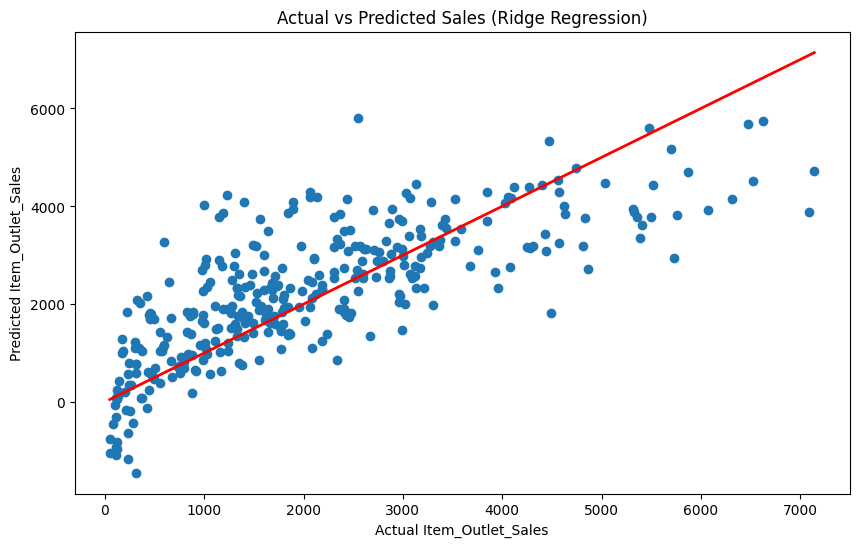

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(test_y, predict_test_ridge)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', lw=2)
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual vs Predicted Sales (Ridge Regression)')
plt.show()